# Tracking the Growth of COVID-19 Cases

The purpose of this notebook is to display the 7 day rolling average of confirmed cases of COVID-19 in various locations in the US.

**The notebook pulls data from the Johns Hopkins [Data Repository](https://github.com/CSSEGISandData/COVID-19) of global Coronavirus COVID-19 cases**, and then does the following things:

- Gives the data in a series of grid views (Country, State, County)
- Gives the data in a series of charts (scroll to bottom)


## Important Caveats:

- The confirmed cases are not the number of infections in each country, only those that have tested positive.


In [1]:
# **** NOTE: THIS RUNS ON PYTHON 3.7 ****
%run covid_base.py "California" "Los Angeles"

Today's date: 2020-09-17 08:00:03.804743


## Global COVID-19 Analysis

In [2]:
principality = 'Country/Region'
cases, ds = get_cases_ds(principality, dfGlobalConfirmed, dfGlobalDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, dfGlobalConfirmed, dfGlobalDeaths)
print('\nTotal number of cases as of', mostrecentdatecases)
casessummary


Total number of cases as of 9/16/20


,9/16/20 cases,Deaths,Death_rate_pct
Country/Region,,,
US,6630051,196763,2.97
Brazil,4419083,134106,3.03
India,5020359,82066,1.63
Mexico,680931,71978,10.57
United Kingdom,380677,41773,10.97
Italy,291442,35645,12.23
France,443869,31056,7.00


## COVID-19 Country-by-Country Format for Further Analysis

In [3]:
casegrouped = cases.groupby(principality).sum().reset_index()
mc = melt_dataframes_date(casegrouped, principality, caseName)

dsgrouped = ds.groupby(principality).sum().reset_index()
md = melt_dataframes_date(dsgrouped, principality, dName)

countryData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed US cases as of', mostrecentdatecases)
#print('\nNote: if the number of current deaths (high and close) are 0, the dates here will not display')

countryDataTA = dfLocale(countryData, principality, localeName='US')
countryDataTA.sort_values(by='date', ascending=False)[:7]


Number of confirmed US cases as of 9/16/20


,Country/Region,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
41344,US,6553652,2020-09-14,194493.0,422.0,33530.0,36147.142857
41343,US,6520122,2020-09-13,194071.0,378.0,34999.0,34822.428571
41342,US,6485123,2020-09-12,193693.0,714.0,41471.0,34307.571429
41341,US,6443652,2020-09-11,192979.0,1213.0,47552.0,34733.428571
41340,US,6396100,2020-09-10,191766.0,907.0,35888.0,35154.857143
41339,US,6360212,2020-09-09,190859.0,1206.0,33203.0,35243.142857
41338,US,6327009,2020-09-08,189653.0,445.0,26387.0,36167.000000


## US State-by-State COVID-19 Analysis

In [4]:
principality = 'Province_State'
uscases, usds = get_cases_ds(principality, dfUSConfirmed, dfUSDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, uscases, usds)
print('\nTotal number of cases as of', mostrecentdatecases)
casessummary


Total number of cases as of 9/16/20


,9/16/20 cases,Deaths,Death_rate_pct
Province_State,,,
New York,446366,33042.0,7.40
New Jersey,197792,16054.0,8.12
Texas,696807,14738.0,2.12
California,771321,14691.0,1.90
Florida,671201,12939.0,1.93
Massachusetts,125699,9245.0,7.35
Illinois,268238,8599.0,3.21


## COVID-19 State-by-State Format for Further Analysis

In [5]:
uscasegrouped = uscases.groupby(principality).sum().reset_index()
mc = melt_dataframes_date(uscasegrouped, principality, caseName)

usdsgrouped = usds.groupby(principality).sum().reset_index()
md = melt_dataframes_date(usdsgrouped, principality, dName)

stateData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed ' + home_state + ' COVID-19 cases and deaths by county as of', mostrecentdatecases)

#stateData
stateDataTA = dfLocale(stateData, principality, localeName=home_state)
stateDataTA.sort_values(by='date', ascending=False)[:7]


Number of confirmed California COVID-19 cases and deaths by county as of 9/16/20


,Province_State,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
1431,California,765134,2020-09-14,14439.0,61.0,3406.0,3452.714286
1430,California,761728,2020-09-13,14378.0,51.0,2795.0,3267.428571
1429,California,758933,2020-09-12,14327.0,97.0,4028.0,3374.142857
1428,California,754905,2020-09-11,14230.0,153.0,3944.0,3463.285714
1427,California,750961,2020-09-10,14077.0,94.0,3671.0,3563.285714
1426,California,747290,2020-09-09,13983.0,160.0,2946.0,3715.571429
1425,California,744344,2020-09-08,13823.0,65.0,3379.0,4103.857143


## County-by-County COVID-19 Analysis 

In [6]:
principality = 'County'
stateCases, stateDs = get_cases_ds(principality, dfUSConfirmed, dfUSDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, stateCases, stateDs)
print('\nNumber of confirmed ' + home_state + ' cases as of', mostrecentdatecases)
casessummary



Number of confirmed California cases as of 9/16/20


,9/16/20 cases,Deaths,Death_rate_pct
County,,,
Los Angeles,256148,6303.0,2.46
Riverside,56201,1136.0,2.02
Orange,51259,1111.0,2.17
San Bernardino,51252,838.0,1.64
San Diego,43445,748.0,1.72
San Joaquin,19623,399.0,2.03
Sacramento,20660,364.0,1.76


## COVID-19 County-by-County Format for Further Analysis

In [7]:
mc = melt_dataframes_date(stateCases, principality, caseName)
md = melt_dataframes_date(stateDs, principality, dName)

countyData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed ' + home_state + ' cases by county as of', mostrecentdatecases)
#print('\nNote: if the number of current deaths (high and close) are 0, the dates here will not display')

countyData
countyDataTA = dfLocale(countyData, principality, localeName=home_county)
countyDataTA.sort_values(by='date', ascending=False)[:11]


Number of confirmed California cases by county as of 9/16/20


,County,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
4538,Los Angeles,254656,2020-09-14,6231.0,23.0,671.0,833.571429
4537,Los Angeles,253985,2020-09-13,6208.0,11.0,809.0,807.285714
4536,Los Angeles,253176,2020-09-12,6197.0,26.0,1110.0,804.857143
4535,Los Angeles,252066,2020-09-11,6171.0,43.0,1042.0,808.428571
4534,Los Angeles,251024,2020-09-10,6128.0,38.0,1165.0,860.714286
4533,Los Angeles,249859,2020-09-09,6090.0,54.0,618.0,846.285714
4532,Los Angeles,249241,2020-09-08,6036.0,6.0,420.0,960.000000
4531,Los Angeles,248821,2020-09-07,6030.0,25.0,487.0,1007.571429
4530,Los Angeles,248334,2020-09-06,6005.0,5.0,792.0,1083.571429
4529,Los Angeles,247542,2020-09-05,6000.0,23.0,1135.0,1112.285714



7 day new US cases as of 9/16/20


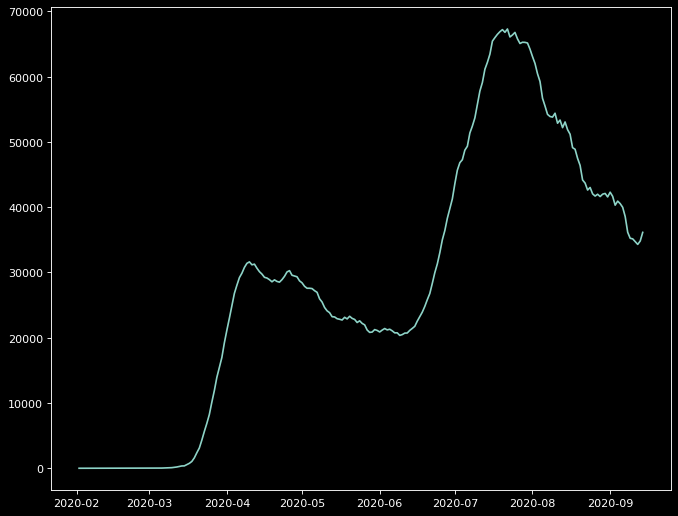

In [8]:
print('\n7 day new US cases as of', mostrecentdatecases)

countryDataTA.index = countryDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(countryDataTA["Rolling7Average"])
plt.show()



7 day average new California cases as of 9/16/20


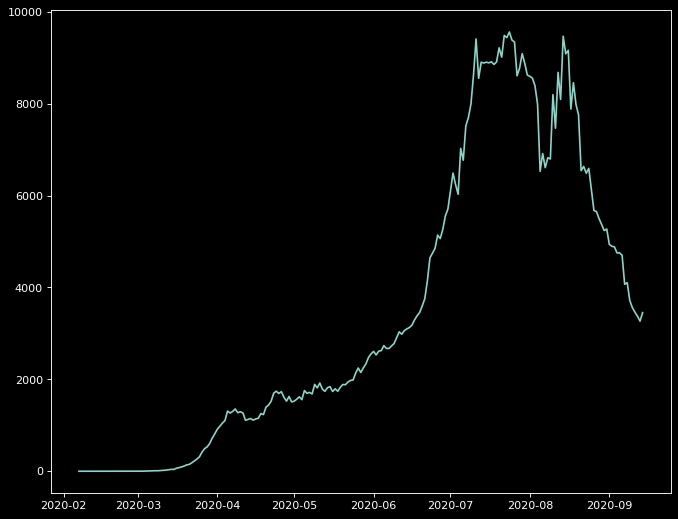

In [9]:
print('\n7 day average new ' + home_state + ' cases as of', mostrecentdatecases)

stateDataTA.index = stateDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(stateDataTA["Rolling7Average"])
plt.show()



7 day average new Los Angeles cases as of 9/16/20


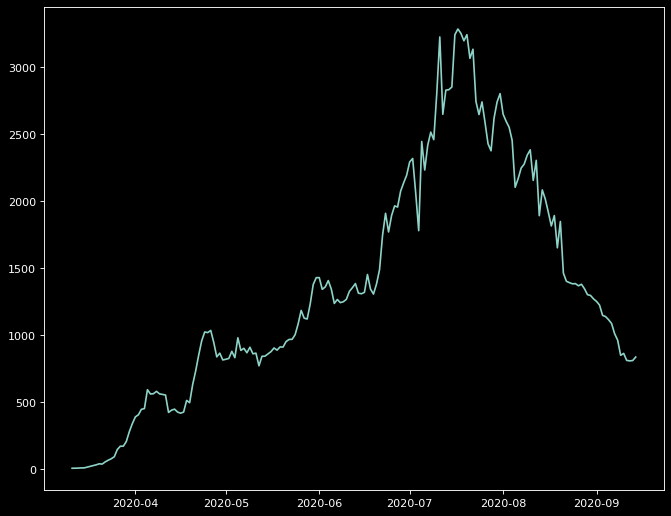

In [10]:
print('\n7 day average new ' + home_county + ' cases as of', mostrecentdatecases)

countyDataTA.index = countyDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(countyDataTA["Rolling7Average"])
plt.show()